In [1]:
import covMatrix
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

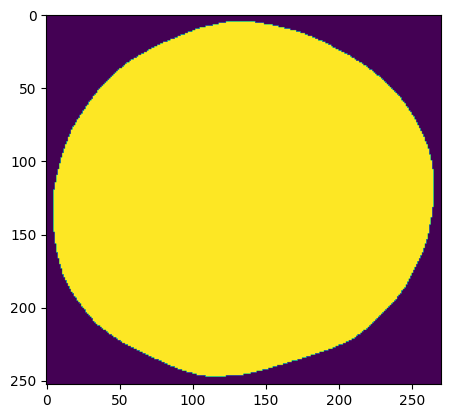

In [31]:
image = cv2.imread("../data/tomatoes/obj0006/im02.png")   # Oblate
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY)
plt.imshow(mask)

In [32]:
print(mask.shape)   # height, width

(253, 270)


In [33]:
# covMatrix.calculate_projected_axes(mask)

In [34]:
mask = mask.astype(np.int32)
squared_mask = np.square(mask)
y_indices, x_indices = np.indices(mask.shape)
positive_pixels = mask == 255

In [35]:
# Use the mask to select the indices of the 255 values
result_x = x_indices[positive_pixels]
result_y = y_indices[positive_pixels]
n = len(result_x)

sx = np.sum(result_x)
cx = sx / len(result_x)
print(sx)

6535621


In [36]:
sxx = np.sum(np.square(result_x))
print(sxx)

1079850437


In [37]:
sy = np.sum(result_y)
cy = sy / len(result_y)
print(sy)

6208119


In [38]:
syy = np.sum(np.square(result_y))
print(syy)

961701677


In [39]:
mult_list = [x * y for x, y in zip(result_x, result_y)]
sxy = np.sum(mult_list)
print(sxy)

818725238


In [40]:
sigma_x2 = (sxx / n) - cx ** 2
sigma_y2 = (syy / n) - cy ** 2
sigma_xy = (sxy / n) - (cx * cy)

In [41]:
cov_matrix = [[sigma_x2, sigma_xy], [sigma_xy, sigma_y2]]
print(cov_matrix)

[[4260.495324863601, -173.71746452707885], [-173.71746452707885, 3586.5527068701485]]


In [42]:
eigenvalues = np.linalg.eigvals(cov_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
major_eigenvalue = sorted_eigenvalues[0]
minor_eigenvalue = sorted_eigenvalues[-1]

a = 2 * (math.sqrt(major_eigenvalue))  # semi major axis of projected ellipse
b = 2 * (math.sqrt(minor_eigenvalue))  # semi minor axis of projected ellipse

print(a, b)

131.18899359363718 119.06989580420242


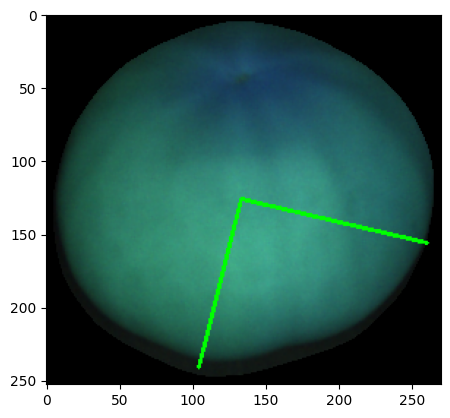

In [43]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
center = (int(cx), int(cy))

# Normalize the eigenvector (make it a unit vector)
direction_a = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
direction_b = eigenvectors[1] / np.linalg.norm(eigenvectors[1])

end_point_a = (int(center[0] + a * direction_a[0]), int(center[1] + a * direction_a[1]))
end_point_b = (int(center[0] + b * direction_b[0]), int(center[1] + b * direction_b[1]))

cv2.line(image, center, end_point_a, (0, 255, 0), 2)
cv2.line(image, center, end_point_b, (0, 255, 0), 2)

plt.imshow(image)

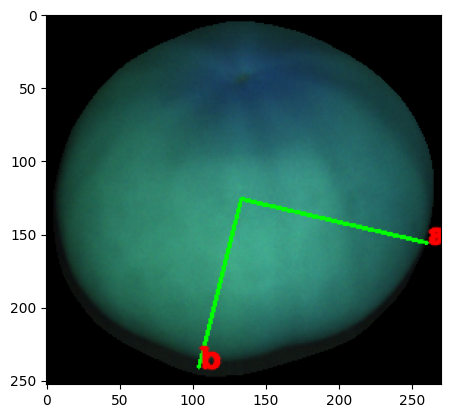

In [44]:
# Font values
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
font_scale = 1
font_color = (255, 0, 0)  # Red color in BGR format
thickness = 2

major_letter = (
    int((center[0] + a * direction_a[0])),
    int((center[1] + a * direction_a[1]))
)
minor_letter = (
    int((center[0] + b * direction_b[0])),
    int((center[1] + b * direction_b[1]))
)

cv2.putText(image, "a", major_letter, font, font_scale, font_color, thickness, cv2.LINE_AA)
cv2.putText(image, "b", minor_letter, font, font_scale, font_color, thickness, cv2.LINE_AA)

plt.imshow(image)